<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-09-25 10:29:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.6MB/s    in 2.5s    

2025-09-25 10:29:58 (60.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


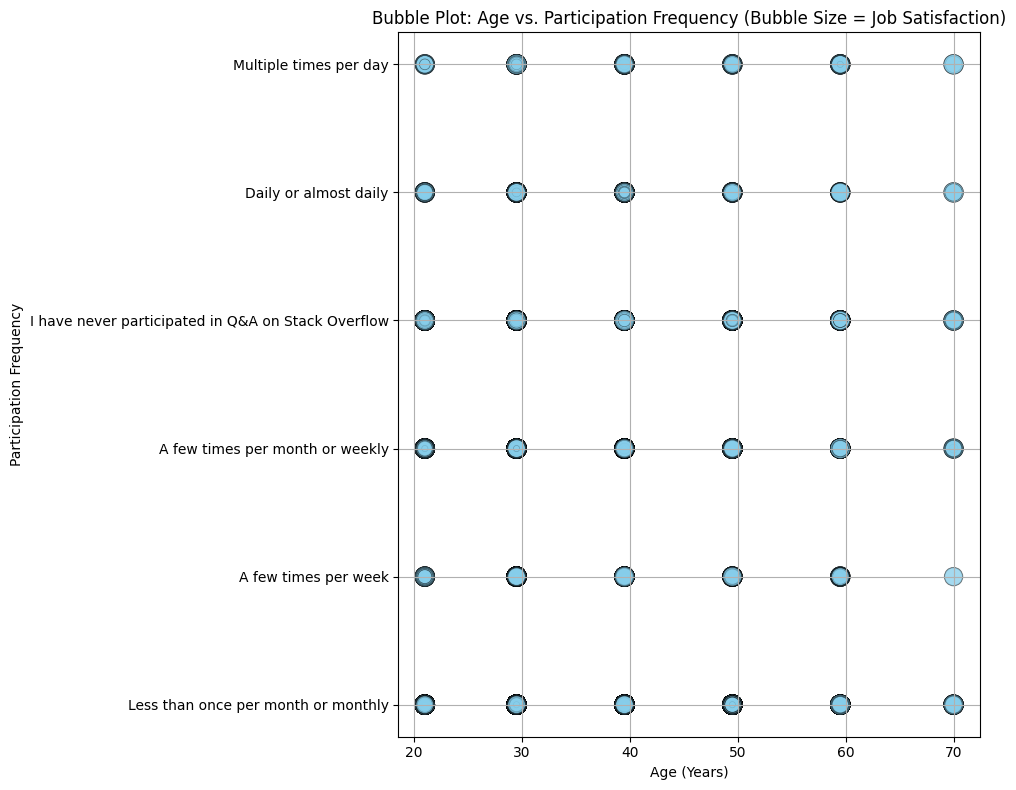

In [5]:
##Write your code here
# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite') 

# Step 2: Query relevant columns
query = 'SELECT Age, SOPartFreq, JobSat FROM main' 
df = pd.read_sql_query(query, conn)

# Step 3: Map Age ranges to midpoints
age_map = {
    "Under 18 years old": None,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['Age'] = df['Age'].map(age_map)

# Step 4: Clean JobSat and SOPartFreq
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'], inplace=True)

# Step 5: Create the bubble plot
plt.figure(figsize=(10, 8))
plt.scatter(
    x=df['Age'],
    y=df['SOPartFreq'],
    s=df['JobSat'] * 20,  # Bubble size scaled by satisfaction
    alpha=0.5,
    c='skyblue',
    edgecolors='black',
    linewidths=0.5
)

# Step 6: Final formatting
plt.title('Bubble Plot: Age vs. Participation Frequency (Bubble Size = Job Satisfaction)')
plt.xlabel('Age (Years)')
plt.ylabel('Participation Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


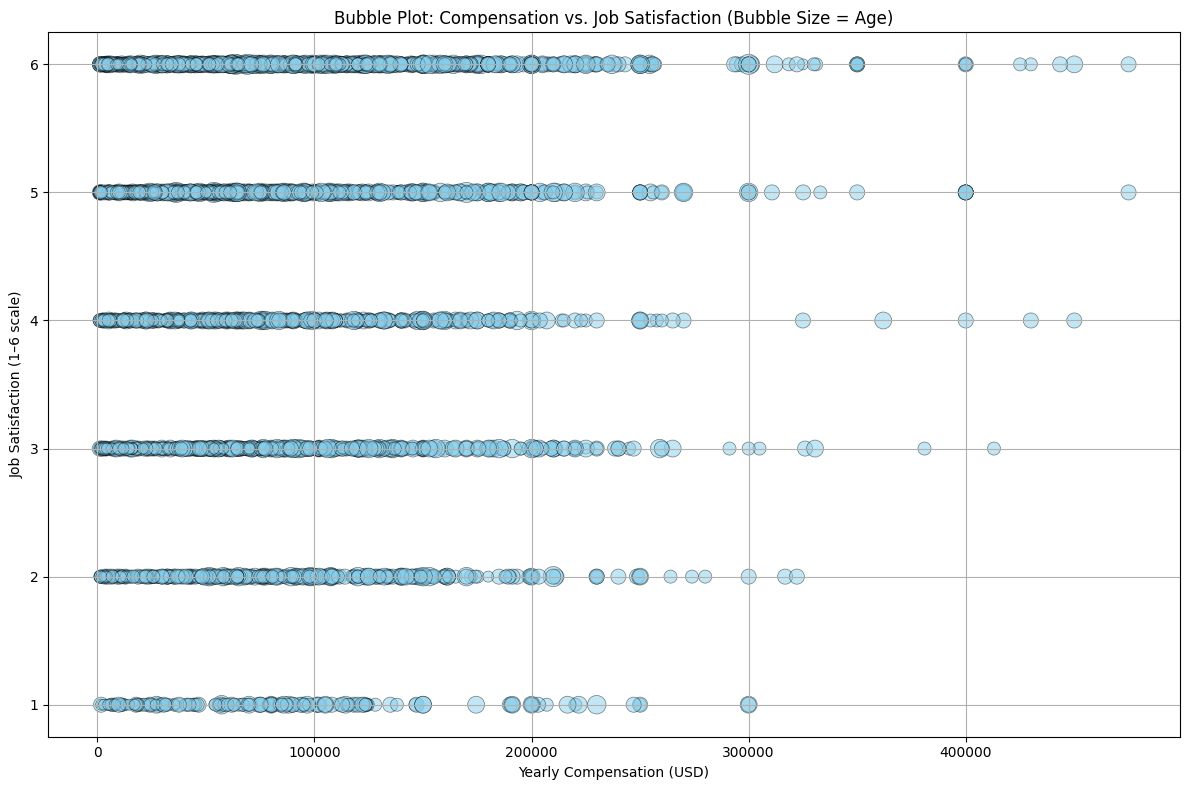

In [8]:
##Write your code here
# Query relevant columns
query = 'SELECT ConvertedCompYearly, JobSat, Age FROM main'
df = pd.read_sql_query(query, conn)

# Map Age ranges to numeric midpoints
age_map = {
    "Under 18 years old": None,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['Age'] = df['Age'].map(age_map)

# Convert numeric fields
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop missing or unrealistic values
df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'], inplace=True)
df = df[(df['ConvertedCompYearly'] > 1000) & (df['ConvertedCompYearly'] < 500000)]
df = df[(df['JobSat'] >= 1) & (df['JobSat'] <= 6)]
df = df[(df['Age'] >= 18) & (df['Age'] <= 70)]

# Create the bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(
    x=df['ConvertedCompYearly'],
    y=df['JobSat'],
    s=df['Age'] * 3,  # Bubble size scaled by age
    alpha=0.5,
    c='skyblue',
    edgecolors='black',
    linewidths=0.5
)

# Final formatting
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (1–6 scale)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



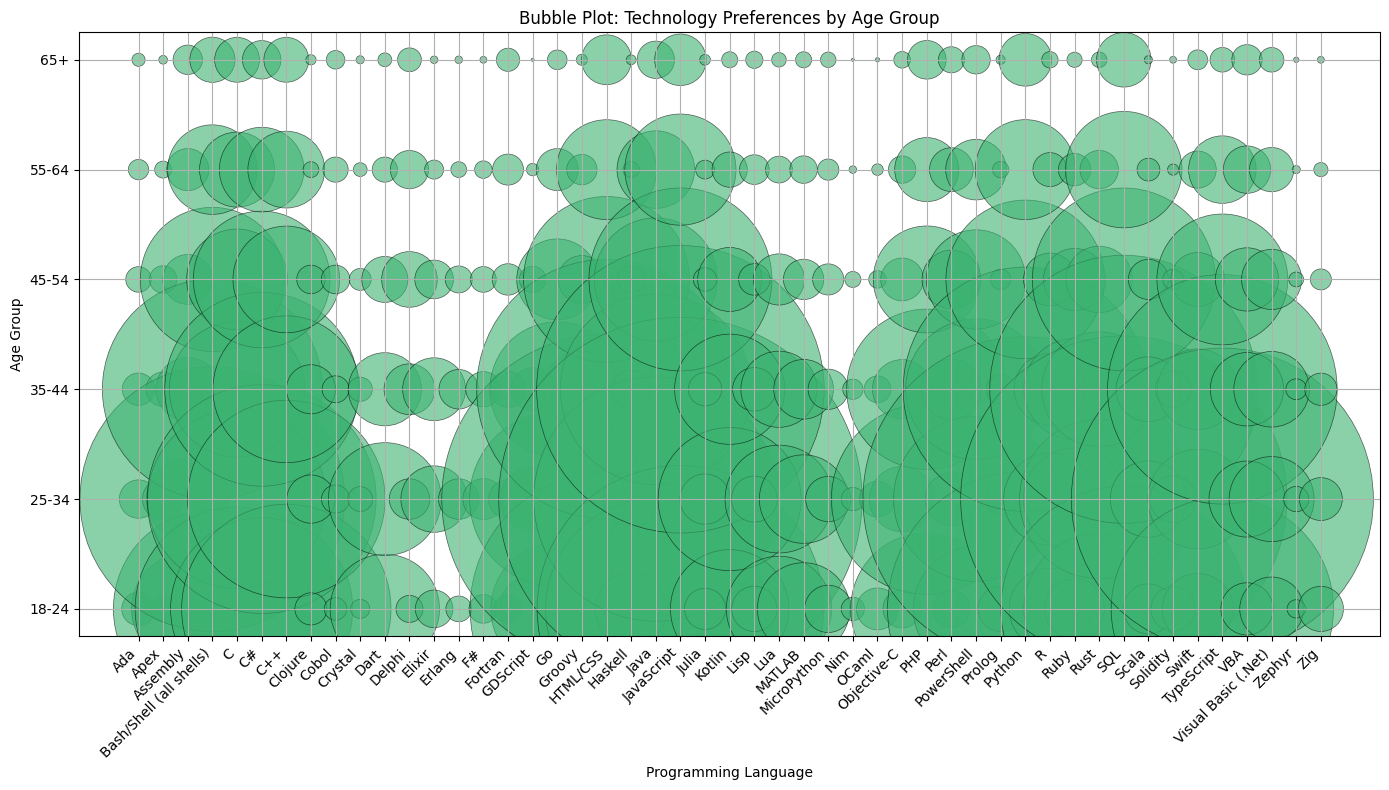

In [9]:
##Write your code here

# Query relevant columns
query = 'SELECT LanguageHaveWorkedWith, Age FROM main'

df = pd.read_sql_query(query, conn)

# Map Age ranges to simplified groups
age_map = {
    "Under 18 years old": None,
    "18-24 years old": "18-24",
    "25-34 years old": "25-34",
    "35-44 years old": "35-44",
    "45-54 years old": "45-54",
    "55-64 years old": "55-64",
    "65 years or older": "65+"
}
df['AgeGroup'] = df['Age'].map(age_map)

#  Drop missing values
df.dropna(subset=['LanguageHaveWorkedWith', 'AgeGroup'], inplace=True)

# Explode multiple languages into separate rows
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageHaveWorkedWith')

# Group by language and age group to count frequency
lang_age_freq = df_exploded.groupby(['LanguageHaveWorkedWith', 'AgeGroup']).size().reset_index(name='Frequency')

# Create bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=lang_age_freq['LanguageHaveWorkedWith'],
    y=lang_age_freq['AgeGroup'],
    s=lang_age_freq['Frequency'] * 5,  # Bubble size scaled by frequency
    alpha=0.6,
    c='mediumseagreen',
    edgecolors='black',
    linewidths=0.5
)

# Final formatting
plt.title('Bubble Plot: Technology Preferences by Age Group')
plt.xlabel('Programming Language')
plt.ylabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


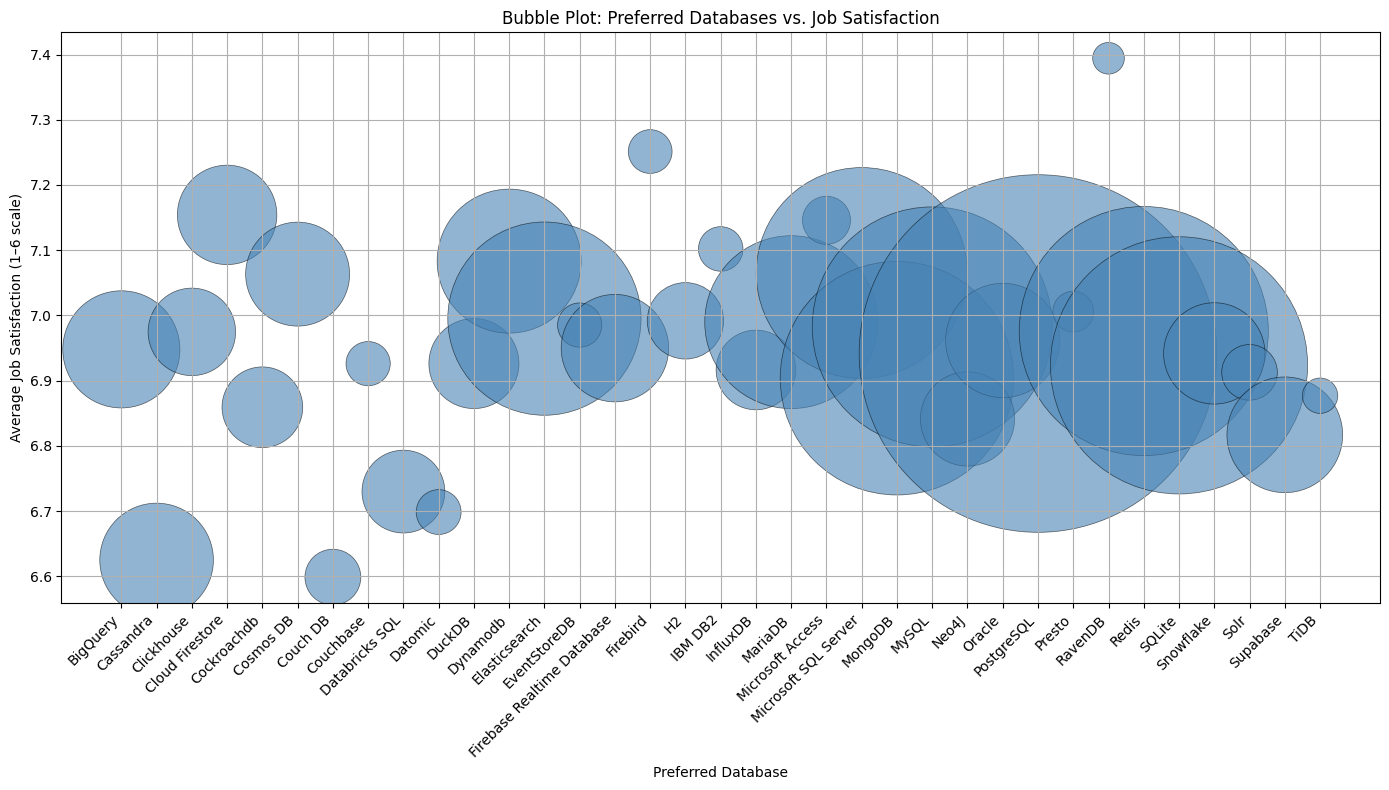

In [11]:
##Write your code here
# Query relevant columns
query = 'SELECT DatabaseWantToWorkWith, JobSat FROM main'

df = pd.read_sql_query(query, conn)

# Clean and prepare data
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'], inplace=True)

# Explode multiple databases into separate rows
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('DatabaseWantToWorkWith')

# Group by database and calculate metrics
db_stats = df_exploded.groupby('DatabaseWantToWorkWith').agg(
    AvgJobSat=('JobSat', 'mean'),
    RespondentCount=('JobSat', 'size')
).reset_index()

# Create bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=db_stats['DatabaseWantToWorkWith'],
    y=db_stats['AvgJobSat'],
    s=db_stats['RespondentCount'] * 5,  # Bubble size scaled by respondent count
    alpha=0.6,
    c='steelblue',
    edgecolors='black',
    linewidths=0.5
)

# Final formatting
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
plt.xlabel('Preferred Database')
plt.ylabel('Average Job Satisfaction (1–6 scale)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


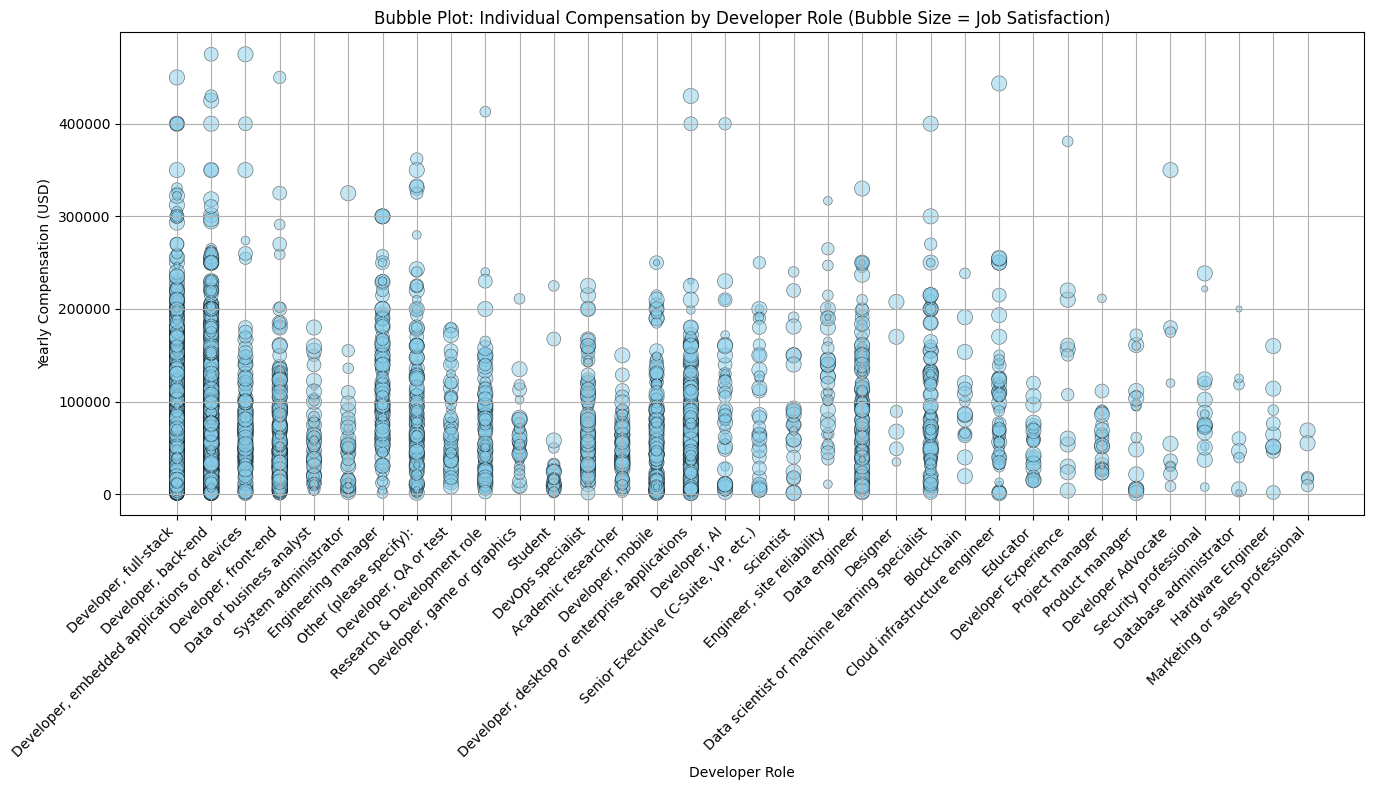

In [15]:
# Import necessary libraries

# Query relevant columns
query = 'SELECT DevType, ConvertedCompYearly, JobSat FROM main'

df = pd.read_sql_query(query, conn)

# Clean and prepare data
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'], inplace=True)

# Filter unrealistic values
df = df[(df['ConvertedCompYearly'] > 1000) & (df['ConvertedCompYearly'] < 500000)]
df = df[(df['JobSat'] >= 1) & (df['JobSat'] <= 6)]

# Explode multiple roles into separate rows
df['DevType'] = df['DevType'].str.split(';')
df_exploded = df.explode('DevType')

# Create bubble plot of individual data points
plt.figure(figsize=(14, 8))
plt.scatter(
    x=df_exploded['DevType'],
    y=df_exploded['ConvertedCompYearly'],
    s=df_exploded['JobSat'] * 20,  # Bubble size scaled by satisfaction
    alpha=0.5,
    c='skyblue',
    edgecolors='black',
    linewidths=0.5
)

# Final formatting
plt.title('Bubble Plot: Individual Compensation by Developer Role (Bubble Size = Job Satisfaction)')
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


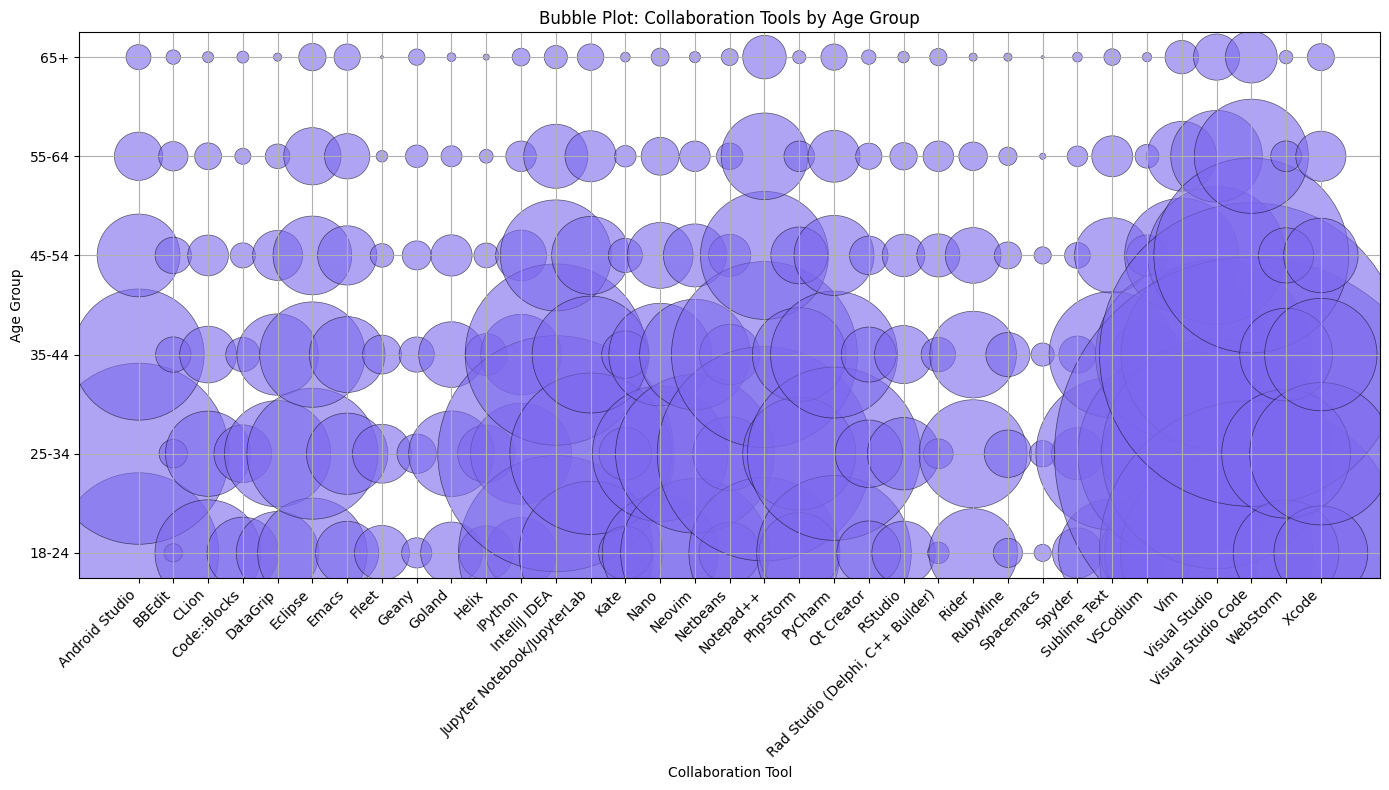

In [17]:
##Write your code here

# Query relevant columns
query = 'SELECT NEWCollabToolsHaveWorkedWith, Age FROM main'
df = pd.read_sql_query(query, conn)

# Map Age ranges to simplified groups
age_map = {
    "Under 18 years old": None,
    "18-24 years old": "18-24",
    "25-34 years old": "25-34",
    "35-44 years old": "35-44",
    "45-54 years old": "45-54",
    "55-64 years old": "55-64",
    "65 years or older": "65+"
}
df['AgeGroup'] = df['Age'].map(age_map)

# Drop missing values
df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'AgeGroup'], inplace=True)

# Explode multiple tools into separate rows
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_exploded = df.explode('NEWCollabToolsHaveWorkedWith')

# Group by tool and age group to count frequency
tool_age_freq = df_exploded.groupby(['NEWCollabToolsHaveWorkedWith', 'AgeGroup']).size().reset_index(name='Frequency')

# Create bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=tool_age_freq['NEWCollabToolsHaveWorkedWith'],
    y=tool_age_freq['AgeGroup'],
    s=tool_age_freq['Frequency'] * 5,  # Bubble size scaled by frequency
    alpha=0.6,
    c='mediumslateblue',
    edgecolors='black',
    linewidths=0.5
)

# Final formatting
plt.title('Bubble Plot: Collaboration Tools by Age Group')
plt.xlabel('Collaboration Tool')
plt.ylabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



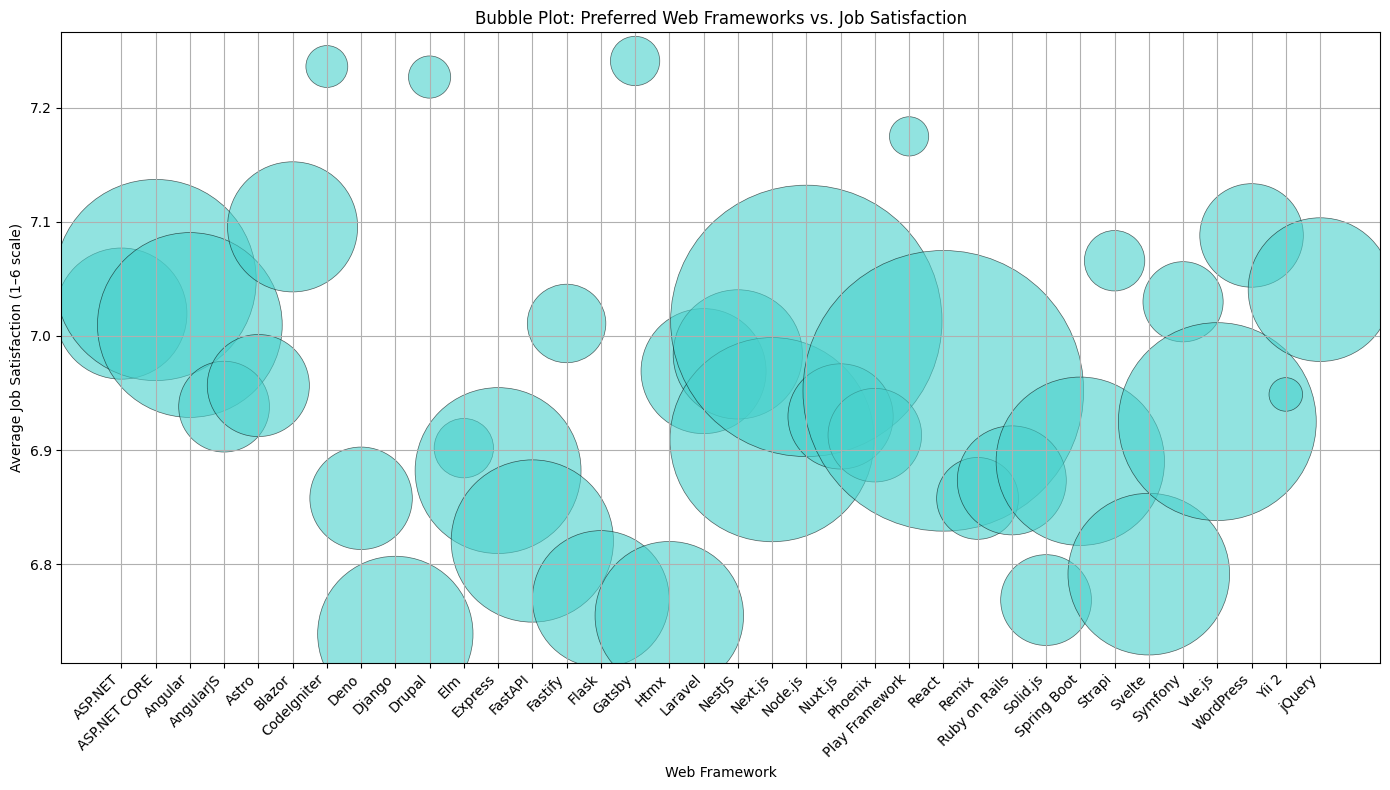

In [19]:
##Write your code here
#Query relevant columns
query = 'SELECT WebframeWantToWorkWith, JobSat FROM main'
df = pd.read_sql_query(query, conn)

# Clean and prepare data
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'], inplace=True)

# Explode multiple frameworks into separate rows
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].str.split(';')
df_exploded = df.explode('WebframeWantToWorkWith')

# Group by framework and calculate metrics
framework_stats = df_exploded.groupby('WebframeWantToWorkWith').agg(
    AvgJobSat=('JobSat', 'mean'),
    RespondentCount=('JobSat', 'size')
).reset_index()

# Create bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=framework_stats['WebframeWantToWorkWith'],
    y=framework_stats['AvgJobSat'],
    s=framework_stats['RespondentCount'] * 5,  # Bubble size scaled by respondent count
    alpha=0.6,
    c='mediumturquoise',
    edgecolors='black',
    linewidths=0.5
)

# Final formatting
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')
plt.xlabel('Web Framework')
plt.ylabel('Average Job Satisfaction (1–6 scale)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



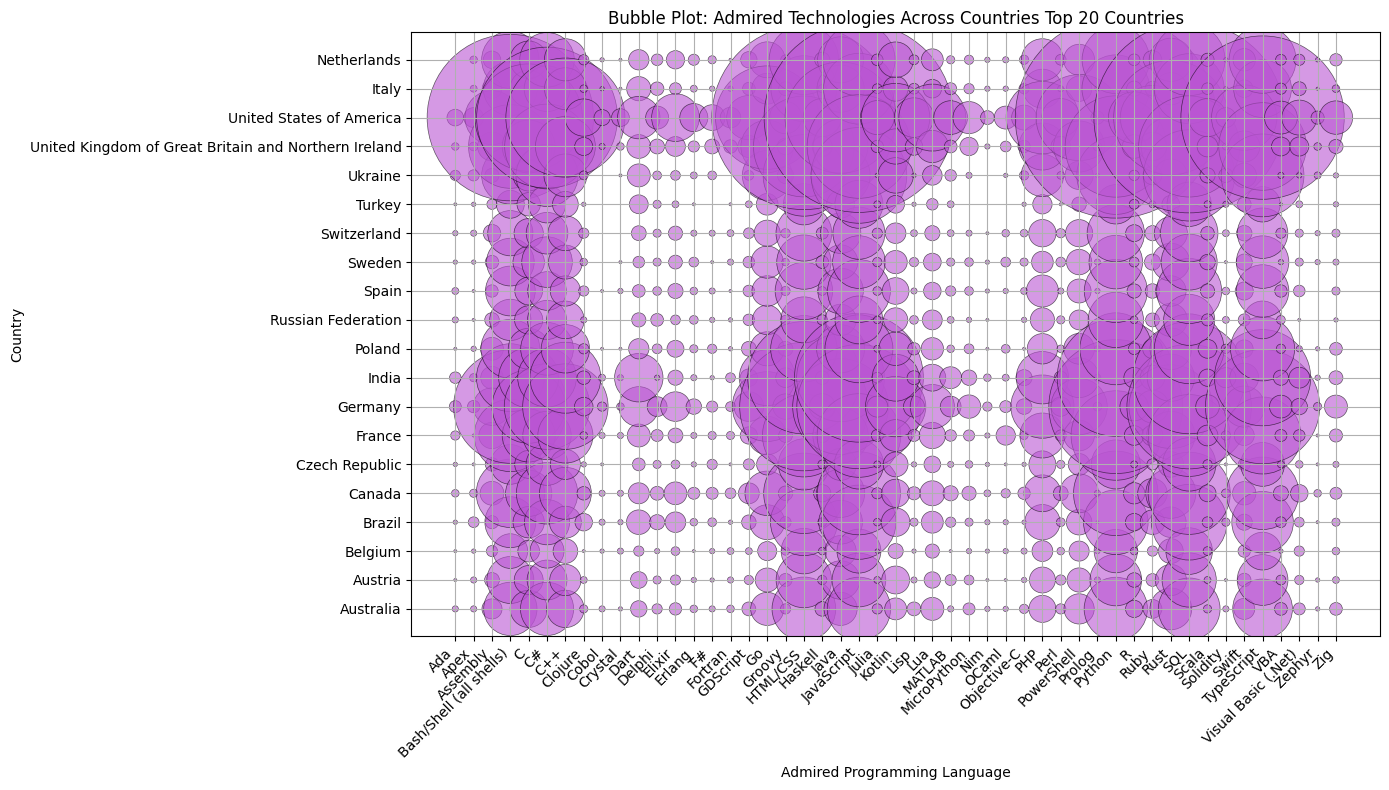

In [21]:
##Write your code here
# Query relevant columns
query = 'SELECT LanguageAdmired, Country FROM main'
df = pd.read_sql_query(query, conn)

# Explode multiple admired languages into separate rows
df['LanguageAdmired'] = df['LanguageAdmired'].str.split(';')
df_exploded = df.explode('LanguageAdmired')

#Filter top 20 countries by frequency
top_countries = df_exploded['Country'].value_counts().nlargest(20).index
df_top = df_exploded[df_exploded['Country'].isin(top_countries)]

# Group by language and country to count frequency
lang_country_freq = df_top.groupby(['LanguageAdmired', 'Country']).size().reset_index(name='Frequency')

# Create bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=lang_country_freq['LanguageAdmired'],
    y=lang_country_freq['Country'],
    s=lang_country_freq['Frequency'] * 5,  # Bubble size scaled by admiration frequency
    alpha=0.6,
    c='mediumorchid',
    edgecolors='black',
    linewidths=0.5
)

# Final formatting
plt.title('Bubble Plot: Admired Technologies Across Countries Top 20 Countries')
plt.xlabel('Admired Programming Language')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
conn.close()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
